## Observations and Insights

1. 
2. 
3. 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, on="Mouse ID",how= "outer")

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
print(mouse_results["Mouse ID"].count())
print(mouse_results["Mouse ID"].nunique())

1893
249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_time = mouse_results.duplicated(subset=["Mouse ID","Timepoint"],keep="first")

#Adding a column for Duplicate Mouse Results True of False
mouse_results["Duplicate Mouse Results"] = duplicate_mice_time

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results = mouse_results.loc[mouse_results["Duplicate Mouse Results"] == True, :]

#DataFrame of the Duplicated mouse
bad_mouse = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop(mouse_results.index[mouse_results['Mouse ID'] == 'g989'])
del clean_mouse_results["Duplicate Mouse Results"]
clean_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_results["Mouse ID"].count())
print(clean_mouse_results["Mouse ID"].nunique())

1880
248


## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_mouse_results.groupby(['Drug Regimen'])

In [10]:
# Mean of Tumor Volume
avg_tumor_reg = regimen_group["Tumor Volume (mm3)"].mean()

In [11]:
# Median of Tumor Volume
med_tumor_reg = regimen_group["Tumor Volume (mm3)"].median()

In [12]:
# Variance of Tumor Volume
var_tumor_reg = regimen_group["Tumor Volume (mm3)"].var()

In [13]:
# Standard Deviation of Tumor Volume
stdev_tumor_reg = regimen_group["Tumor Volume (mm3)"].std()

In [14]:
# SEM of Tumor Volume
sem_tumor_reg = regimen_group["Tumor Volume (mm3)"].sem()
# sem_tumor_reg = sem_tumor_reg[]

In [15]:
# Assemble the resulting series into a single summary dataframe.
regimen_statistics = pd.DataFrame({"Tumor Volume Mean" : avg_tumor_reg,
                                   "Tumor Volume Median" : med_tumor_reg,
                                   "Tumor Volume Variance" : var_tumor_reg,
                                   "Tumor Volume St. Deviation" : stdev_tumor_reg,
                                   "Tumor Volume SEM" : sem_tumor_reg})
regimen_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
regimens = clean_mouse_results['Drug Regimen'].unique()
regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [17]:
total_volume = regimen_group['Drug Regimen'].count()
total_volume

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

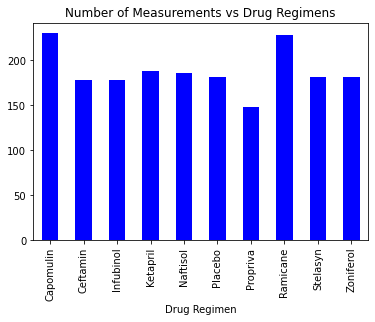

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_drug_pan = total_volume.plot(x = regimens, y = total_volume, 
                                 kind="bar", color='blue',
                                 title = "Number of Measurements vs Drug Regimens")


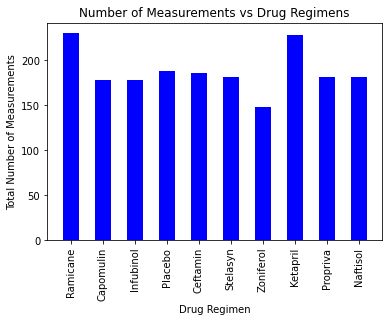

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_drug_py = plt.bar(regimens, total_volume, color ="blue", 
                       width = .5)

plt.title("Number of Measurements vs Drug Regimens")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

In [20]:
gender_sort = clean_mouse_results.sort_values(by=['Sex'])
gender = gender_sort['Sex'].unique()

In [21]:
gender_group = clean_mouse_results.groupby(['Sex'])
gender_count = gender_group['Sex'].count()

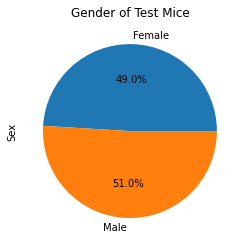

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_gender_pan = gender_count.plot(y = gender_count, kind = "pie", 
                                   title = "Gender of Test Mice", autopct = '%1.1f%%')
pie_gender_pan

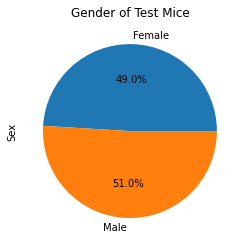

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender_py = plt.pie(gender_count, labels = gender, autopct = '%1.1f%%')

plt.title("Gender of Test Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [25]:
#Created DataFrames for each of the top Drugs
capomulin_results = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == 'Capomulin']
ramicane_results = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == 'Ramicane']
infubinol_results = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == 'Infubinol']
ceftamin_results = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == 'Ceftamin']

In [26]:
#Merged the top 4 druf DataFrames
top_results = pd.merge(capomulin_results,ramicane_results,how= "outer")
top_results = pd.merge(top_results,infubinol_results,how= "outer")
top_results = pd.merge(top_results,ceftamin_results,how= "outer")

In [27]:
# Start by getting the last (greatest) timepoint for each mouse
top_mouse_results = top_results.groupby(["Mouse ID"])
final_time_tumor = top_mouse_results[["Timepoint", "Tumor Volume (mm3)"]].max()
final_tumor_volume = final_time_tumor["Tumor Volume (mm3)"]

In [45]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_results = pd.merge(top_results,final_time_tumor,on= ["Mouse ID", "Timepoint"],how= "left")
final_top_results = top_results.rename(columns = {"Tumor Volume (mm3)_x": "Tumor Volume (mm3)", "Tumor Volume (mm3)_y" : "Final Tumor Volume (mm3)"})
final_top_results = final_top_results.dropna()
final_top_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3),Tumor Volume (mm3)
9,s185,Capomulin,Female,3,17,45,23.343598,1,45.000000,45.000000
19,x401,Capomulin,Female,16,15,45,28.484033,0,45.473753,45.473753
29,m601,Capomulin,Male,22,17,45,28.430964,1,45.000000,45.000000
34,f966,Capomulin,Male,16,17,20,30.485985,0,45.000000,45.000000
44,u364,Capomulin,Male,18,17,45,31.023923,3,47.212200,47.212200
...,...,...,...,...,...,...,...,...,...,...
773,x226,Ceftamin,Male,23,28,0,45.000000,0,45.000000,45.000000
783,x581,Ceftamin,Female,19,28,45,64.634949,3,64.634949,64.634949
793,x822,Ceftamin,Male,3,29,45,61.386660,3,61.386660,61.386660
803,y769,Ceftamin,Female,6,27,45,68.594745,4,68.594745,68.594745


In [80]:
# Put treatments into a list for for loop (and later for plot labels)
top_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in top_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = final_top_results.loc[final_top_results["Drug Regimen"] == drug, 'Final Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
#tumor_volume_list

[9      45.000000
 19     45.473753
 29     45.000000
 34     45.000000
 44     47.212200
 54     45.000000
 64     45.781746
 74     46.414518
 84     46.749006
 94     45.595685
 104    45.893720
 114    46.304003
 124    46.154737
 134    45.000000
 144    45.651331
 152    46.408361
 162    48.158209
 165    45.000000
 175    45.704434
 185    46.809225
 195    45.000000
 205    48.070452
 215    47.373423
 225    47.685963
 229    46.539206
 Name: Final Tumor Volume (mm3), dtype: float64,
 239    45.000000
 249    45.851531
 259    45.000000
 269    45.000000
 279    45.000000
 289    45.252534
 299    45.521875
 309    46.940945
 319    46.910892
 329    45.000000
 339    46.343832
 349    45.000000
 359    45.625802
 369    45.000000
 377    46.585433
 387    45.000000
 394    45.722279
 404    45.466677
 414    46.409084
 424    47.622816
 434    45.766111
 444    45.000000
 451    45.568211
 453    45.000000
 457    46.378092
 Name: Final Tumor Volume (mm3), dtype: float64,
 4

In [81]:
#Calculating the quartiles and IQR
cap_lowerq = np.quantile(tumor_volume_list[0],.25)
cap_median = np.quantile(tumor_volume_list[0],.5)
cap_highq = np.quantile(tumor_volume_list[0],.75)
cap_iqr = cap_highq - cap_lowerq
cap_lb = cap_lowerq - (1.5 * cap_iqr)
cap_ub = cap_highq + (1.5 * cap_iqr)

ram_lowerq =np.quantile(tumor_volume_list[1],.25)
ram_median = np.quantile(tumor_volume_list[1],.5)
ram_highq =np.quantile(tumor_volume_list[1],.75)
ram_iqr = ram_highq - ram_lowerq
ram_lb = ram_lowerq - (1.5 * ram_iqr)
ram_ub = ram_highq + (1.5 * ram_iqr)

inf_lowerq =np.quantile(tumor_volume_list[2],.25)
inf_median = np.quantile(tumor_volume_list[2],.5)
inf_highq =np.quantile(tumor_volume_list[2],.75)
inf_iqr = inf_highq - inf_lowerq
inf_lb = inf_lowerq - (1.5 * inf_iqr)
inf_ub = inf_highq + (1.5 * inf_iqr)

cef_lowerq =np.quantile(tumor_volume_list[3],.25)
cef_median = np.quantile(tumor_volume_list[3],.5)
cef_highq =np.quantile(tumor_volume_list[3],.75)
cef_iqr = cef_highq - cef_lowerq
cef_lb = cef_lowerq - (1.5 * cef_iqr)
cef_ub = cef_highq + (1.5 * cef_iqr)


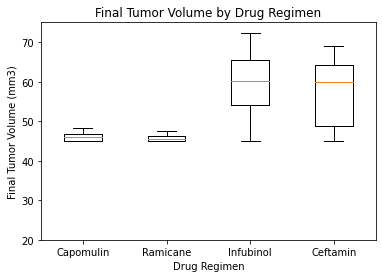

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_volume_list, labels = top_regimens, showfliers = True)
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylim(20,75)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = capomulin_results.groupby(["Mouse ID"])
capomulin_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
435,i557,Capomulin,Female,1,24,20,43.967895,0
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [96]:
one_mouse = capomulin_results.loc(capomulin_results["Mouse ID"] == "s185")

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen